학습 데이터에 모델이 과적합되는 현상은 모델의 성능을 떨어뜨리는주요 이슈이다. 모델이 과적합되면 훈련 데이터에대한정확도는 높을지라도, 새로운 데이터. 즉, 검증 데이터나 테스트 데이터에 대해서는 제대로동작하지 않는다. 이는 모델이학습데이터를 불필요할정도로 과하게 암기하여 훈련 데이터에 포함된 노이즈까지 학습한 상태라고해석할 수 있다.

#1. 데이터의 양을 늘리기

모델은 데이터의 양이 적을 경우, 해당 데이터의 특정 패턴이나 노이즈까지 쉽게 암기하게 되므로 과적합 현상이 발생할 현상이 늘어난다. 그렇기 때문에 데이터의 양을 늘릴 수록 모델은 데이터의 일반적인 패턴을 학습하여 과적합을 방지할 수 있다.

만약, 데이터의 양이 적을 경우 의도적으로 기존읟 ㅔ이터를 조금씩 변형하고추가하여데이터의 양을 늘리기도하는데 이를 데이터증식 또는증강이라고한다. 이미지의 경우에는 데이터 증식이 많이 사용되는데 이미지를 돌리거나 노이즈를 추가하고, 일부분을 수정하는 등으로 데이터를 증식시킨다.

#2. 모델의 복잡도 줄이기

인공 신경망의 복잡도는 은닉층의 수나 매개변수의 수 등으로 결정된다. 과적합 현상이 포착되었을 떄, 인공 신경망 모델에 대해서할 수 있는 한 가지 조치는 인공 신경망의 복잡도를 줄이는 것이다.

In [3]:
import torch
from torch import nn

In [5]:
class Architecture1(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Architecture1, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc3 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    out = self.relu(out)
    out = self.fc3(out)
    return out

위 인공 신경망은 3개의 선형 레이어를 가지고 있다. 위 인공 신경망이 입력 데이터에 과적합 현상을 보인다면, 다음과 같이 인공 신경망의 복잡도를 줄일 수 있다.

In [6]:
class Architecture1(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Architecture1, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

위 인공 신경망은 2개의 선형 레이어를 가지고 있다.
- 인공 신경망에서는 모델에 있는 매개변수들의 수를 모델의 수용력이라고 하기도 한다.

#3. 가중치 규제(Regularization) 적용하기

복잡한 모델이 간단한 모델보다 과적합될 가능성이 높다. 그리고 간단한 모델은 적은 수의 매개변수를 가진 모델을 말한다. 복잡한 모델은 좀 더 간단하게 하는방법으로 가중치 규제가 있다.  
- L1규제: 가중치 w들의 절대값 합계를 비용 함수에 추가한다. L1노름이라고도 한다.
- L2규제: 모든 가중치 w들의 제곱합을 비용 함수에 추가한다. L2노름이라고도 한다.

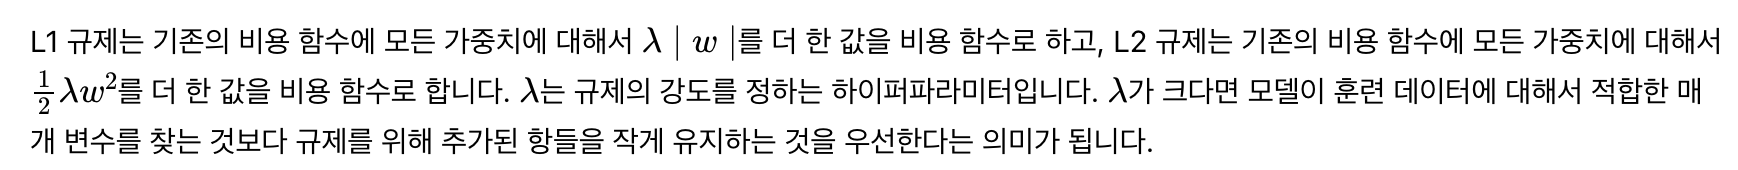

이 두 식 모두 비용 함수를 최소화하기 위해서는 가중치 w들의 값이 작아져야 한다는 특징이 있다. L1 규제로예를 들면 L1규제를 사용하면 비용 함수가 최소가 되게 하는 가중치와 편향을 찾는 동시에 가중치들의 절대값의 합도최소가 되어야 한다. 이렇게 되면, 가중치 w의 값들은 0 또는 0에 가까이 작아져야 하므로 어떤 특성들은 모델을 만들 때 거의 사용되지 않게 된다.

예를 들어 H(x) = w1x1 + w2x2 + w3x3 + w4x4라는 수식이 있을때 여기에 L1규제를 사용하였더니, w3의 값이 0이 되었다고하면 이는 x3특성은 사실 모델의 결과에 별 영향을 주지 못하는 특성임을 의미한다.

L2규제는 L1규제와는 달리 가중치들의 제곱을 최소화하므로 w의 값이 완전히 0이 되기보다는 0에 가까워지는 경향을 띈다. L1규제는 어떤 특성들이 모델에 영향을 주고 있는지를 정확히 판단하고자 할 때 유용하다. 만약, 이런 판단이 필요없다면 경험적으로는 L2규제가 더 잘 동작하므로 L2규제를 권장한다. 인공 신경망에서 L2규제는 가중치 감쇠라고도 부른다.

파이토치에서는 옵티마이저의 weight_decay 매개변수를 설정하므로서 L2규제를 적용한다. weight_decay 매개변수의 기본값은 0이다. weight_decay 매개변수에 다른 값을 설정할 수도 있다.

In [8]:
model = Architecture1(10,20,2)
optimizer = torch.optim.Adam(model.parameters(),lr=1e-4,weight_decay=1e-5)

- 인공 신경망에서 정규화라는 용어가 쓰이는 기법으로는 또배치 정규화, 층 정규화 등이 있다.

#4. 드롭아웃(Dropout)

드롭아웃은 학습 과정에서신경망의 일부를 사용하지 않는 방법이다.

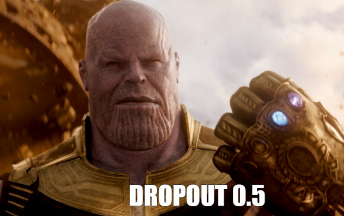

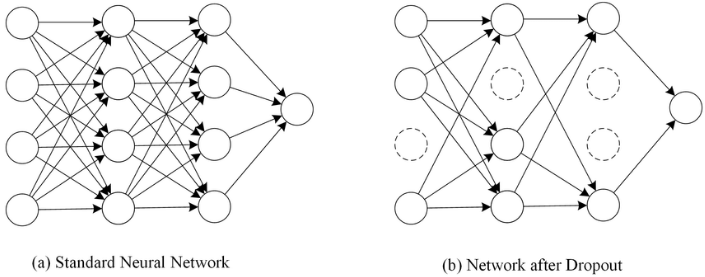

드롭아웃은 신경망 학습 시에만 사용하고, 예측 시에는 사용하지 않는 것이일반적이다. 학습 시에는 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지해주고, 매번 랜덤 선택으로 뉴런들을 사용하지 않으므로 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합을 방지한다.